# What is hugging face 


Hugging Face is a pivotal open-source AI hub, offering more than just a repository for models, datasets, and scripts. It's a collaborative platform for AI professionals and enthusiasts, featuring tools like Gradio and comprehensive resources for machine learning

Their aim is to make it easy for people to do anything machine learning and build a community around it.  Hugging face staff and users alike create blogs, tutorials, share papers and are hosted on the site.  They have a discord and a forum that will help you with any questions you have and have open source libraries to make it easy to get started in machine learning. 


# Overview of key libaries 


## Hugging Python client library


Hugging Python client library allows you to manage all things hugging face hub and is aim at individuals and teams collaborating on shared machine learning projects. You can create new reposities, download files from the hub, upload to hub and search for models and run inference (run queries against models) and  deploy models.  See the quick start guide here for more information https://huggingface.co/docs/huggingface_hub/quick-start

## Hugging face Transformers 


The library here is a wide ranging library, originally was intended for nlp task but has since expanded to computer vision, audio and multimodal.  Its a high level API that allows you to use pretrained models and fine tune among other featues.  The list of supported models and framworks can be found [here](https://huggingface.co/docs/transformers/index).  The library compatable of jax, Pytorch and TensorFlow.  

Some of the key features include:
 - [pipelines is a high-level, easy-to-use, API for doing inference over a variety of downstream-tasks](https://huggingface.co/docs/transformers/main_classes/pipelines)
 - [Trainer is a high-level API for PyTorch that makes training a much simpler task](https://huggingface.co/docs/transformers/main_classes/trainer)
 - [Quantization for reducing memory requirements and inference speed](https://huggingface.co/docs/transformers/main_classes/quantization)
 
 - and many more

 ## Gradio 


Gradio is a open source python library that allows you to quickly create UIs for your machine learning models.  It allows you to create a UI for your model in 3 lines of code making it easy to showcase your work.  It also allows you to share your model with others. Its both be local but hugging face have a tight intergration where you can host on hugging face for free. It has a number of features including:

- [Create a UI for your model in 3 lines of code](https://gradio.app/getting_started)
- [one of the new features is the chat interface to help with the growth of all the language models](https://www.gradio.app/docs/chatinterface)
- [share your model with others](https://gradio.app/getting_started)

## Hugging Face Diffuers


This model is the go-to library for pretrained diffusion for generating for images, audio and 3d structures of modecules.  It has high level pipeline api for creating inference with just a few lines of code.  It has interchangable noise schedulers for balancing speed and quality and pretrained models that can be used as a starting point for your own models.  ["find more informatiohn here"](https://huggingface.co/docs/diffusers/index).

and finally the last library we will talk about in more detail is the datasets library.

# Datasets

## Overview 


The purpose of this library is to make it easy to access and share and shape datasets. The library is the backbone to the hugging face hub and is used to organise, transfer the datasets so they can be used within a machine learninng pipeline.  Nearly every deep learning workflow starts with a dataset so understanding the hugging face datasets library is important to aquire data training and fine tuning models.  Once you have a dataset, the next step is to pass this to a dataset loader, this could be in pytorch or tensorflow or just use with one of the one of higher level apis that hugging face provide and you dont need to worry about the underlying architecture.

## Technical details 


Hugging faces dataset library is built ontop of Apache Arrow making it fast and efficient for data loading and supports caching making it even more efficent.  Arrow allows fast processing and is column oriented, memory mapping and gives incredable performance gains. It includes features for processing and preparing data, like filtering, splitting, and shuffling.  


## Why use Hugging Face datasets library


In simple terms, hugging face dataset library that gives you everything you need to use a existing dataset or create datasets and get streight into machine learning pipline. [find more information here](https://huggingface.co/docs/datasets/index).  Its platform agnostic and can be used with any framework.  If you want to train with pytorch or tensorflow, it makes it easy to get started.  It has a large number of datasets that are ready to use and can be used with the transformers library.  Its well documented and has a large community that can help you with any questions you have.  Get started with just 3 lines of code, load a dataset and start exploring in your notebook or script.  The code below will show the beans dataset, you can also view the fdataset the hugging face hub [here](https://huggingface.co/datasets/beans).

In [1]:
# install and import the necessary libraries
!pip install datasets[vision] 
from datasets import load_dataset, Image 
# Downloads the dataset called beans
dataset = load_dataset("beans", split="train")

c:\ProgramData\Anaconda3\envs\eye_tracking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## The competition

The hugging face dataset library does have some competition in kaggle which also machine learning platform which Hosts Datasets, Notebooks and competion and are more orianted to competions and using notebooks on their platform.  The hugging face dataset library is more orianted to datasets and has a large number of datasets that are ready to use and prebuilt piplines that you can use own hardware or other another platform.  The kaggle python api can be found here  
https://github.com/Kaggle/kaggle-api

The dataset library also has some competition in  pytorch and tensorflow.  The pytorch dataset library can be found here https://pytorch.org/docs/stable/data.html and the tensorflow dataset library can be found here https://www.tensorflow.org/datasets/catalog/overview but are more geared at using their frameworks.

# How to transform the dataset into a format that can be used by the model

Personally i found the transform part of the dataset library the most confusing part of the library.  There are lots of ways to transform the data and it can be done once loaded and on the fly.  Understanding the different ways to transform the data is important to get the data into a format that can be used by the model and prevent confusion and going round in circles.  Heres some of ways you can use the library to transform data :

- [Reordering Rows and Splitting the Dataset](https://huggingface.co/docs/datasets/process)<br>
- [Renaming and Removing Columns](https://huggingface.co/docs/datasets/process)<br>
- [Applying Processing Functions to Each Example](https://huggingface.co/docs/datasets/process)<br>
- [Concatenating Datasets](https://huggingface.co/docs/datasets/process)<br>
- [Applying a Custom Formatting Transform](https://huggingface.co/docs/datasets/quickstart)<br>
- [Applying Transforms to Images](https://huggingface.co/docs/datasets/use_dataset)<br>
- [Data Augmentation](https://huggingface.co/docs/datasets/use_dataset)<br>
- [Exporting a Dataset](https://huggingface.co/docs/datasets/v2.16.1/process)<br>



We've already imported dataset using the hugging face library.  The next step is to pass this over to pytorch so we can train our model but we could pass this over to tensorflow if required.  Before we pass it over we need to transform the data to tensors instead of PIL.jpeg format as shown below.

In [2]:
dataset["image"][:5]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>]

This requires installing pytorch and importing transforms from the torchvision library.  Create a function to convert jpg into Tensors and then pass this function to datasets using the with_transform function.

In [3]:
# creates a ToTensor object that converts the image to a tensor
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [4]:
# creates a function that takes in a batch and returns the batch a tensors (previously images were in PIL format)
def transform_images(batch):
    batch['image'] = [to_tensor(image) for image in batch['image']]
    return batch

In [5]:
# Executes what we have set above the transform on the dataset, the returning dataset[image] will be a tensor  
dataset = dataset.with_transform(transform_images, batched=True)

In [6]:
# now we can access the first image as a tensor
dataset["image"][0]

tensor([[[0.2196, 0.2196, 0.2196,  ..., 0.8078, 0.2627, 0.2118],
         [0.2118, 0.2157, 0.2157,  ..., 0.6706, 0.3843, 0.2000],
         [0.1961, 0.2000, 0.2039,  ..., 0.6706, 0.3961, 0.3294],
         ...,
         [0.2196, 0.1882, 0.2275,  ..., 0.5804, 0.6353, 0.5529],
         [0.1961, 0.1922, 0.2706,  ..., 0.6196, 0.5843, 0.6157],
         [0.2275, 0.2118, 0.1882,  ..., 0.5647, 0.6196, 0.6000]],

        [[0.1490, 0.1490, 0.1490,  ..., 0.6039, 0.0667, 0.0196],
         [0.1412, 0.1451, 0.1451,  ..., 0.4980, 0.2078, 0.0314],
         [0.1333, 0.1373, 0.1412,  ..., 0.5216, 0.2510, 0.1882],
         ...,
         [0.1020, 0.0706, 0.1098,  ..., 0.7020, 0.7569, 0.6745],
         [0.0784, 0.0745, 0.1529,  ..., 0.7255, 0.6824, 0.7137],
         [0.1098, 0.0941, 0.0706,  ..., 0.6471, 0.7020, 0.6784]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.5490, 0.0314, 0.0039],
         [0.0000, 0.0039, 0.0039,  ..., 0.3843, 0.1255, 0.0000],
         [0.0000, 0.0039, 0.0078,  ..., 0.3804, 0.1373, 0.

In [14]:
dataset["labels"][1]

int

In [16]:
dataset.set_format(type='torch', columns=['image', 'labels'])

In [ ]:
dataset["labels"][1]

# Creating a hugging face dataset from scratch

## create the dataset

For this I will be using a dataset ive created myself for mapping pictures of me at the screen and co-ordinates on screen.  The data was collected by writing a program that placed “x” on the screen at random coordinates. The program then recorded the coordinates of the “x” and a picture of the user’s face. The program then saved the image and named the file as the coordinates of the “x”. The process was repeated until the model was able to predict the coordinates of the “x” with a high degree of accuracy.

In [2]:
#| echo: False
#| output: False
import os
import sys
from datasets import Dataset, Image
import torch

In [3]:
#| echo: False
#| output: False
# dataset location on my drive 
data_science_folder = 'G:\My Drive\Learning\data_science'
sys.path.append(data_science_folder)
dataset_path = data_science_folder + "\\datasets_folder\gaze-points\work-laptop"

A typical file name looks like the :

- 20240123-140252-hieght2560-width1440-computerwork-laptop_2232_230.png

with the targets (the pixel im looking at on screen) in the file name and the file contents is a image of me looking at the screen.  The last 2 numbers 2232 and 230 are the pixel co-ordinates that need to be stripped out of the file name.  Below, ill detail how to strip out the co-ordinates.

In [4]:
# extracts screen coordinates from the filenames and stores in a list of tensors
label_tensors = [torch.tensor([int(f.split('_')[-2]), int(f.split('_')[-1].split('.')[0])]) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

We have imported the dataset using the hugging face library.  The next step is to get a list of the full file names to pass to the Dataset object to be load the images.

In [5]:
# gets a list of all images in a directory and stores in a list of strings
image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

In [6]:
# confirm that the length of the labels and images are the same so they can be paired together during the creation of the dataset
len_image_files = len(image_files)
len_labels = len(label_tensors)

print(f"confirm length of labels {len_labels} and length of image_files {len_image_files} are the same")

confirm length of labels 2060 and length of image_files 2060 are the same


Load the images and cast (use the pil library to convert the images)

In [7]:
# create the dataset from the image files and labels
dataset = Dataset.from_dict({"image": image_files}).cast_column("image", Image())

In [8]:
# create a new dictionary with the images and labels
# i'm not happy with having to add the labels to the dataset after as it takes alot longer
# but i'm not sure how to do it in the the from_dict method above.
updated_dataset_dict = {"image": dataset["image"], "label": label_tensors}
updated_dataset = Dataset.from_dict(updated_dataset_dict)

## Transforming the dataset into tensors ready for pytorch

We will need to transform the data to tensors instead of PIL.jpeg format and the labels will need to be tensors.  You can see from viewing the first element in the cell below that its a list of 2 intergers.  The image is a picture of me looking at the screen.  We now need to convert the labels and images to tensors using pytorches vision library using the transforms function.  We can then pass this to the dataset object using the with_transform function.

There a couple of ways to do this in hugging face datasets library.  The first is to use the map function and the second is to use the with_transform function.  The map function is applies straight away but consumes a lot of memory and the with_transform function is applied when the data is loaded.  The with_transform function is the best option for large datasets.  The map function is the best option for small datasets.  The with_transform method is shown below.

In [9]:
updated_dataset["label"][0]

[850, 976]

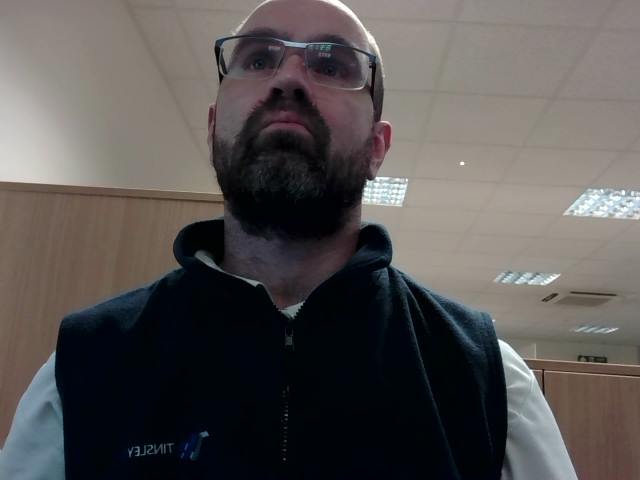

In [106]:
updated_dataset["image"][0]

In [10]:
# Creates a transform that converts the image to a tensor
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [11]:
# Creates a function that takes in a batch of the dataset and returns the batch with the image converted to a tensor
def transform_images(batch):
    batch['image'] = [to_tensor(image) for image in batch['image']]
    #batch['label'] = [torch.tensor(label) for label in batch['label']]
    return batch

In [22]:
# Executes the transform on the dataset, the returning dataset[image] will be a tensor  
updated_dataset2 = updated_dataset.with_transform(transform_images,columns="image")

In [23]:
updated_dataset2.set_format(type='torch', columns=['label'])

We can now see the that the image is 3 channels (Red, Blue, Green) and the size of the image is 500 by 500.  We can also see that the labels are now tensors.

In [115]:
updated_dataset["image"][0].shape

torch.Size([3, 480, 640])

In [25]:
dataset["image"][0]

In [ ]:
updated_dataset["label"][0].shape

KeyError: 'image'

In [ ]:
dataset["label"][0]

KeyError: "Column label not in the dataset. Current columns in the dataset: ['image_file_path', 'image', 'labels']"

In [116]:
# need to sort shape out.